<a href="https://colab.research.google.com/github/MohitPunasiya/EE_769-Introduction-to-ML/blob/main/A3_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Loading & preprocessing

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/DataKPCA.csv")

In [ ]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,3.121555,14.985682,-47.909555,-8.811677,-2.175834,1.893953,1.958302
std,0.589013,1.298751,2.459375,2.337179,0.505819,0.159647,0.108756
min,1.964315,11.577329,-52.837231,-14.068488,-3.613443,1.750006,1.761394
25%,2.679532,14.087484,-49.736194,-10.392405,-2.512570,1.773690,1.880257
50%,3.039420,14.943396,-48.185549,-9.045948,-2.156469,1.852369,1.942348
75%,3.489341,15.764749,-46.405402,-7.235609,-1.828925,1.954614,2.018826
max,4.820967,18.747792,-40.772554,-1.907331,-0.972995,2.580983,2.332842


In [ ]:
from sklearn.preprocessing import StandardScaler  #Scaling the dataset
sc = StandardScaler()
sc.fit(df)
arr_trans = sc.transform(df)

In [ ]:
df_trans = pd.DataFrame(arr_trans,columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']) #after standardisation dataframe

#Data Visualisation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f71719d2450>,
      dtype=object)

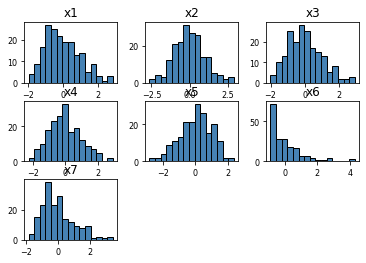

In [ ]:
df_trans.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,xlabelsize=8, ylabelsize=8, grid=False)
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html

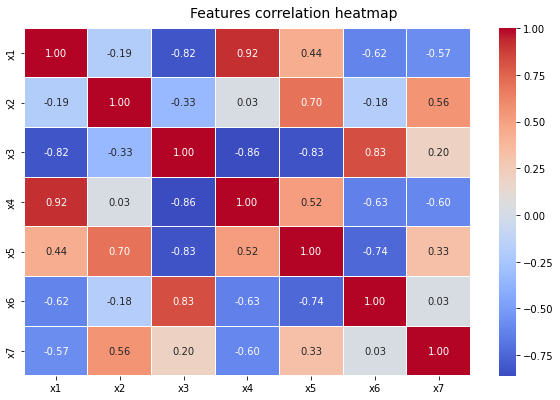

In [ ]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = df_trans.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.06)
f.subplots_adjust(top=0.93)
t= f.suptitle('Features correlation heatmap', fontsize=14)
#https://seaborn.pydata.org/generated/seaborn.heatmap.html

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


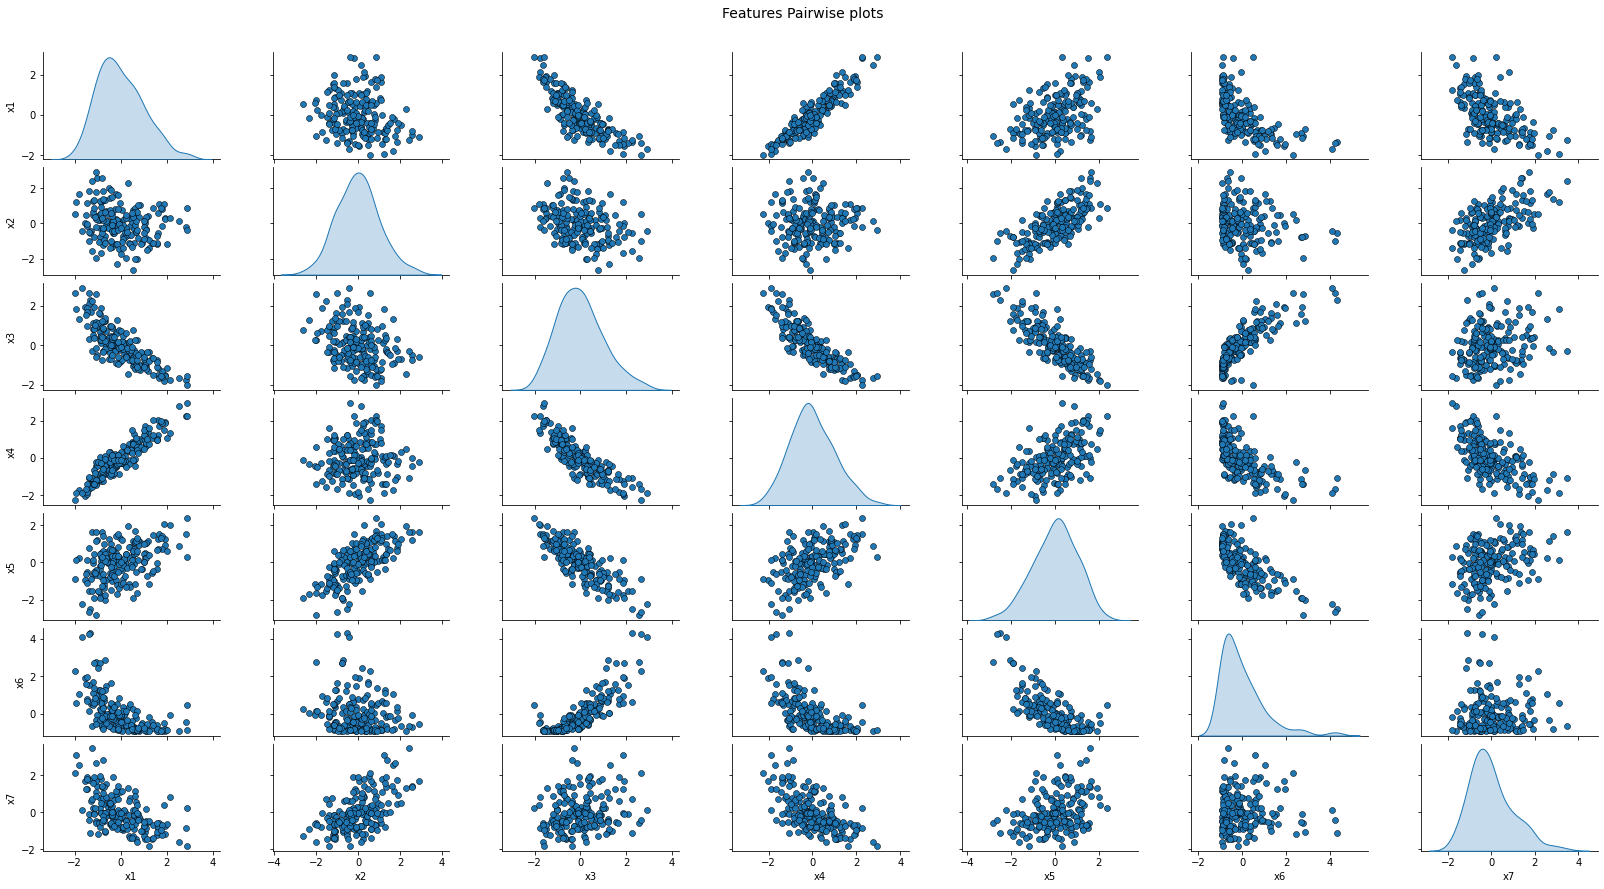

In [ ]:
# Pair-wise Scatter Plots
cols = list(df.columns)
pp = sns.pairplot(df_trans[cols], size=1.8, aspect=1.8, plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Features Pairwise plots', fontsize=14)
#https://seaborn.pydata.org/generated/seaborn.pairplot.html

# Using 'rbf' as kernel

In [ ]:
from sklearn.decomposition import KernelPCA
transformer = KernelPCA(n_components=10, kernel='rbf',gamma = 0.01)
X_transformed = transformer.fit_transform(df_trans)
explained_variance = np.var(X_transformed, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
cumsum = np.cumsum(explained_variance_ratio)
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

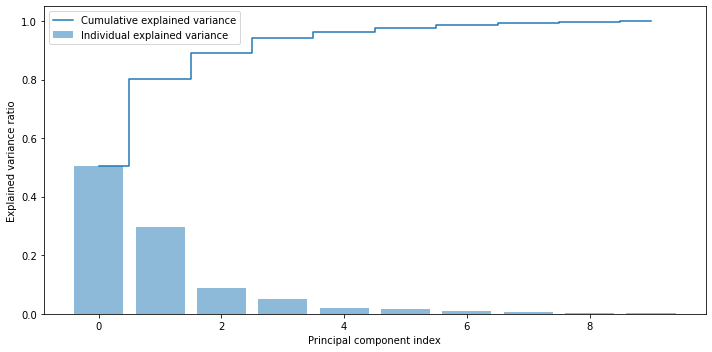

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(range(0,len(explained_variance_ratio)),explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cumsum)), cumsum, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
#https://vitalflux.com/pca-explained-variance-concept-python-example/

-This can be seen from plot that we need 7-8 principal components adress more than 90 % of variance if we choose gamma (kernel coefficient as 1/n_features)

-but if we decrease gamma to 0.001 than captured variance is almost equivalent to linear kernel

# Using linear kernel

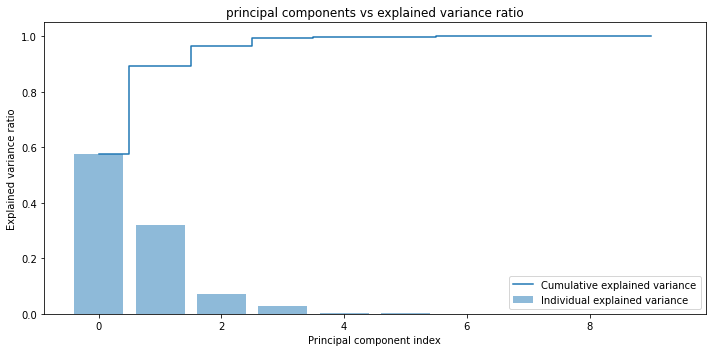

In [ ]:
transformer_ = KernelPCA(n_components=10, kernel='linear')
X_transformed_ = transformer_.fit_transform(df_trans)
explained_variance_ = np.var(X_transformed_, axis=0)
explained_variance_ratio_ = explained_variance_ / np.sum(explained_variance_)
cumsum_ = np.cumsum(explained_variance_ratio_)
plt.figure(figsize=(10,5))
plt.bar(range(0,len(explained_variance_ratio_)),explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cumsum_)), cumsum_, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('principal components vs explained variance ratio')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
#https://vitalflux.com/pca-explained-variance-concept-python-example/

This can be seen from plot that first 3 principal components contains more than 95 % of variance

# Inferences

we tried with both linear and rbf kernel, we inferred that if we use rbf kernel than number of component needed 
to get the same explained variance is more compared to the case when we use linear kernel(no kernel)

But by varying the kernel coefficient gamma we can get better results while producing principle components